# Biodiversity in National Park

This project aims to interpret data provided by the National Parks Service regarding species in various national parks. It involves data analysis, cleaning, visualization, and identifying patterns or themes related to the conservation statuses of these species.

## Project Scope

* Data Collection:

  Acquire the necessary datasets from the National Parks Service, ensuring the data is up-to-date and relevant.

* Data Analysis:

  * Analyze the conservation statuses in different category.
  * Analyze the parks in different category.
  
* Data Cleaning:

  Clean and preprocess the data to ensure accuracy and consistency.

* Data Visualization:

  Create informative and visually appealing plots and graphs to help convey the findings.

* Findings and Conclusions:

  * Summarize the results and conclusions drawn from the analysis.
  * Identify any significant patterns or trends in the data.

## Working Area

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

### Data Loading

In [2]:
df1 = pd.read_csv('/content/observations.csv')
df2 = pd.read_csv('/content/species_info.csv')

# Merge the data
dfm = df1.merge(df2, on='scientific_name')

# See the data
dfm.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


### Exploratory Data Analysis (EDA)

In [3]:
# Check for data type in the data
dfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


Only the observations column has integer type data, the rest have string type data.

In [4]:
# Check for missing values in the data
dfm.isna().sum()

scientific_name            0
park_name                  0
observations               0
category                   0
common_names               0
conservation_status    24752
dtype: int64

Because conservation status has missing values in the form of categories as much as 96% of the total data, these missing values are left alone or not handled.

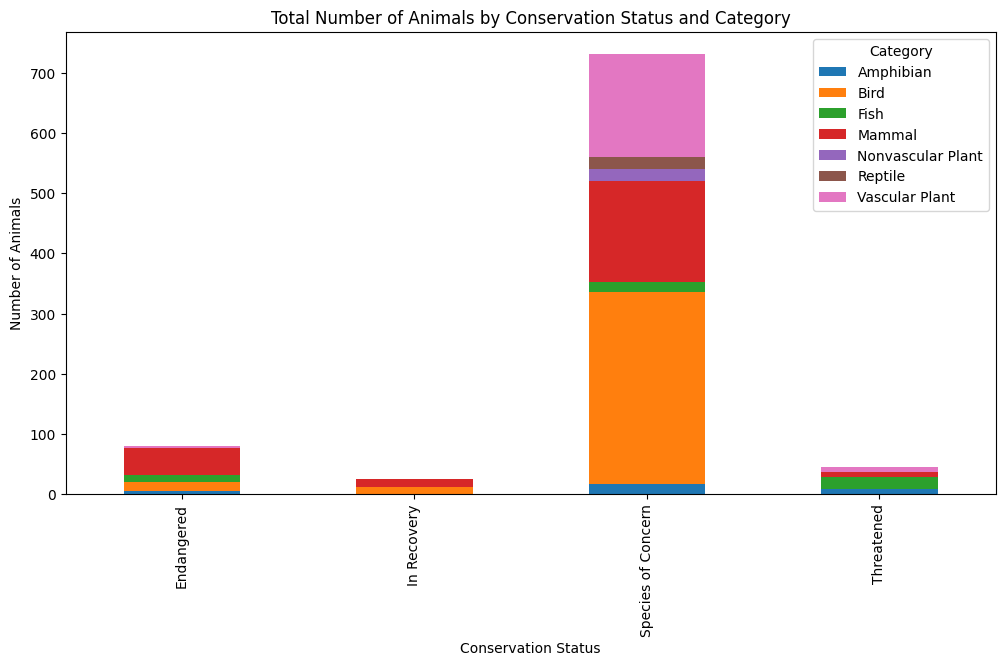

In [5]:
# Create a bar plot to show the total number of animals by conservation status and category
grouped_data = dfm.groupby(['conservation_status', 'category']).size().unstack().fillna(0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Total Number of Animals by Conservation Status and Category")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Animals")
plt.legend(title='Category')
plt.show()

* Conservation Status Species of Concern has the largest number of Animals compared to other Conservation Statuses.
* The number of Conservation Status Species of Concern is dominated by Bird.
* The number of Conservation Status Endangered is dominated by Mammal.
* The number of Conservation Status In Recovery is dominated by Mammal and Bird.
* The number of Conservation Status Threatened is dominated by Fish.

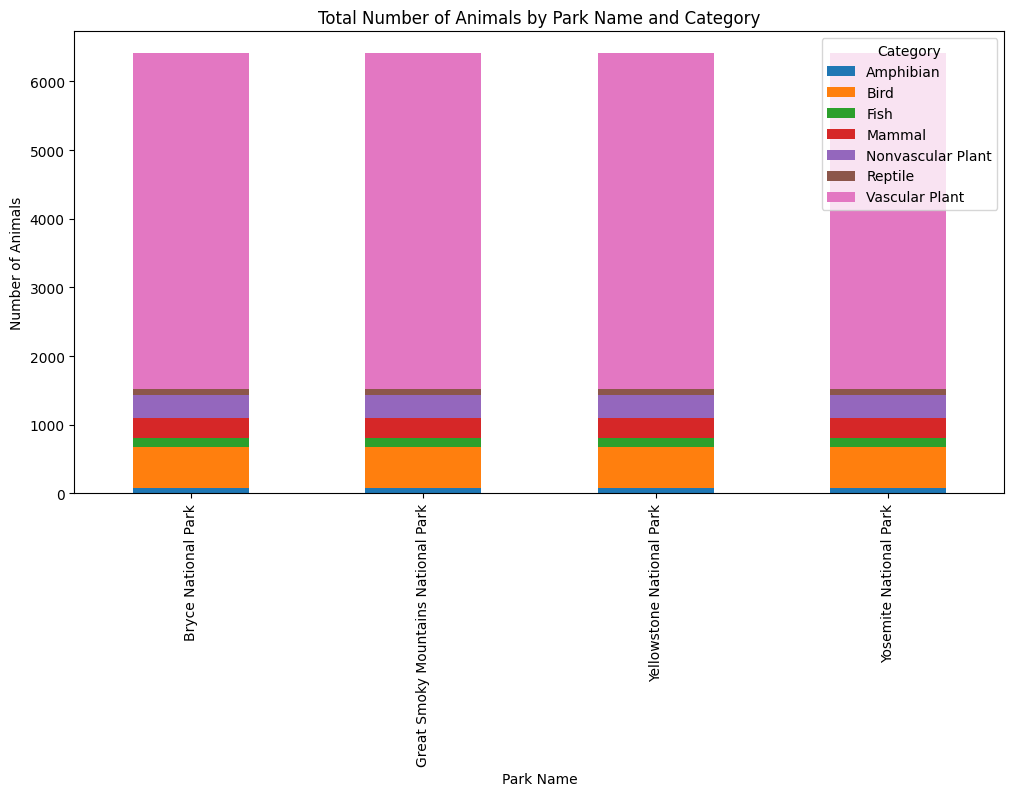

In [6]:
# Create a bar plot to show the total number of animals by park name and category
grouped_data = dfm.groupby(['park_name', 'category']).size().unstack().fillna(0)
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Total Number of Animals by Park Name and Category")
plt.xlabel("Park Name")
plt.ylabel("Number of Animals")
plt.legend(title='Category')
plt.show()

There is no difference in the number of Animals throughout the park.

In [7]:
# Perform a chi-squared test between park name and conservation status
ct = pd.crosstab(dfm['park_name'], dfm['conservation_status'])
chi2, p, dof, expected = chi2_contingency(ct)

alpha = 0.05
if p < alpha:
    print("There is a statistically significant association between Park Name and Conservation Status.")
else:
    print("There is no statistically significant association between Park Name and Conservation Status.")

There is no statistically significant association between Park Name and Conservation Status.


## Conclusion

* The Conservation Status "Species of Concern" has the largest number of animals compared to other Conservation Statuses. This suggests that there are more species in the park that are of concern for their conservation.

* The "Species of Concern" category is dominated by birds, indicating that a significant portion of the animals in this status are avian species facing conservation challenges.

* The Conservation Status "Endangered" is dominated by mammals, which implies that a substantial number of endangered animals in the park belong to this group.

* "In Recovery" status is primarily composed of mammals and birds, indicating that these two groups have a higher representation among the species that are on the path to recovery.

* "Threatened" species are primarily fish, suggesting that the animals in the "Threatened" category are predominantly fish species.

* There is no significant difference in the number of animals throughout the park. This means that, on the whole, the park appears to maintain a relatively balanced distribution of animals across the various Conservation Statuses.

* There is no statistically significant association between Park Name and Conservation Status. This indicates that the distribution of species across different Conservation Statuses is consistent across all parks, and there is no particular park where a specific Conservation Status is significantly more prevalent.

In summary, the information provided highlights the diversity of Conservation Statuses and their dominant groups of animals in the park, with no significant variation in animal numbers among parks or in their association with specific Conservation Statuses.